<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import PIL.Image as Image
import tensorflow_datasets as tfds

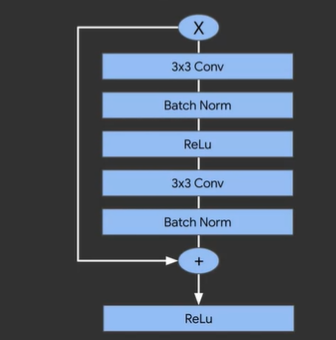

In [21]:
Image.open('/content/Screenshot 2021-10-21 123935.png')

In [44]:
class IdentityBlock(tf.keras.Model):
  def __init__(self,filters,kernel):
    super(IdentityBlock,self).__init__(name = '')
    self.conv1 = tf.keras.layers.Conv2D(filters,kernel,padding='same')
    self.bn1   = tf.keras.layers.BatchNormalization()
    self.conv2 = tf.keras.layers.Conv2D(filters,kernel,padding = 'same')
    self.bn2   = tf.keras.layers.BatchNormalization()

    self.act  = tf.keras.layers.Activation('relu')
    self.add   = tf.keras.layers.Add()
    
  def call(self,input_tensor):
    x = self.conv1(input_tensor)
    x = self.bn1(x)
    x = self.act(x)

    x = self.conv2(x)
    x = self.bn2(x)

    x = self.add([x,input_tensor])
    x = self.act(x)
    return x

In [55]:
class ResNet(tf.keras.Model):
  def __init__(self,num_classes):
    super(ResNet,self).__init__()
    self.conv = tf.keras.layers.Conv2D(64,7,padding = 'same')
    self.bn  = tf.keras.layers.BatchNormalization()
    self.act  = tf.keras.layers.Activation('relu')
    self.max_pool   = tf.keras.layers.MaxPool2D((3,3))

    self.id1a  = IdentityBlock(64,3)
    self.id2b  = IdentityBlock(64,3)

    self.global_pool   = tf.keras.layers.GlobalAveragePooling2D()
    self.classifier = tf.keras.layers.Dense(num_classes,activation='softmax')

  def call(self,inputs):
    x = self.conv(inputs)
    x = self.bn(x)
    x = self.act(x)
    x = self.max_pool(x)

    x = self.id1a(x)
    x = self.id2b(x)

    x = self.global_pool(x)
    return self.classifier(x)


In [60]:
def preporcess(features):
  return tf.cast(features['image'],tf.float32)/255.,features['label']

In [61]:
resnet = ResNet(10)

In [62]:
resnet.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [63]:
dataset = tfds.load('mnist',split=tfds.Split.TRAIN,data_dir='./data')
dataset = dataset.map(preporcess).batch(32)
hist = resnet.fit(dataset,epochs = 1)

1875/1875 [==============================] - 232s 123ms/step - loss: 0.1235 - accuracy: 0.9670


In [64]:
import matplotlib.pyplot as plt

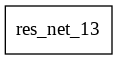

In [67]:
tf.keras.utils.plot_model(resnet)

In [68]:
resnet.summary()

Model: "res_net_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            multiple                  3200      
_________________________________________________________________
batch_normalization_9 (Batch multiple                  256       
_________________________________________________________________
activation_5 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
identity_block_4 (IdentityBl multiple                  74368     
_________________________________________________________________
identity_block_5 (IdentityBl multiple                  74368     
_________________________________________________________________
global_average_pooling2d_1 ( multiple                  0